In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series

import matplotlib.pyplot as plt

In [2]:
names = ["userid","time","bank_id","pre_amount_of_bill","pre_repayment","credit_amount",\
         "amount_of_bill_left","least_repayment","consume_amount","amount_of_bill","adjust_amount",\
         "circ_interest","avail_amount","prepare_amount","repayment_state"]

bill_train = pd.read_csv("../../pcredit/train/bill_detail_train.txt",header=None)
bill_test = pd.read_csv("../../pcredit/test/bill_detail_test.txt",header=None)

bill_data = pd.concat([bill_train,bill_test])
bill_data.columns=names
bill_data.head()

,userid,time,bank_id,pre_amount_of_bill,pre_repayment,credit_amount,amount_of_bill_left,least_repayment,consume_amount,amount_of_bill,adjust_amount,circ_interest,avail_amount,prepare_amount,repayment_state
0,3150,5906744363,6,18.626118,18.661937,20.664418,18.905766,17.847133,1,0.0,0.0,0.0,0.0,19.971271,0
1,3150,5906744401,6,18.905766,18.909954,20.664418,19.113305,17.911506,1,0.0,0.0,0.0,0.0,19.971271,0
2,3150,5906744427,6,19.113305,19.150290,20.664418,19.300194,17.977610,1,0.0,0.0,0.0,0.0,19.971271,0
3,3150,5906744515,6,19.300194,19.300280,21.000890,20.303240,18.477177,1,0.0,0.0,0.0,0.0,20.307743,0
4,3150,5906744562,6,20.303240,20.307744,21.000890,20.357134,18.510985,1,0.0,0.0,0.0,0.0,20.307743,0


In [11]:
#  1)获取消费笔数  
consume_amount = bill_data[['userid','consume_amount']]
consume_amount = pd.pivot_table(consume_amount,index=['userid'],values=['consume_amount'],aggfunc=np.sum)
consume_amount.head()

,consume_amount
userid,
2,58
3,4
4,2
5,0
6,122


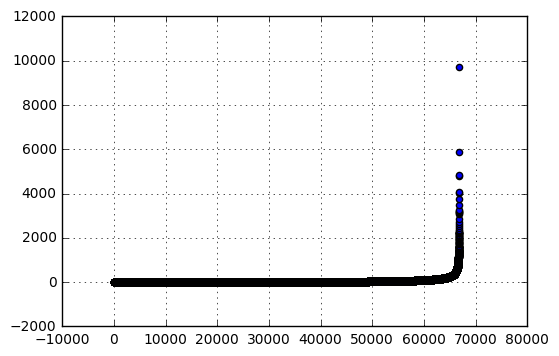

In [12]:
data = consume_amount['consume_amount'].sort_values()
nn = range(len(data))
plt.scatter(nn,data)
plt.grid(True)
plt.show()

In [13]:
def getNum(x):
    if x < 250: return 1
    if x < 500: return 2
    if x < 750: return 3
    if x < 1000: return 4
    return 5
consume_amount['consume_amount#0'] = consume_amount['consume_amount'].apply(lambda x:getNum(x))
consume_amount.drop(['consume_amount'],axis=1,inplace=True)
consume_amount.head()

,consume_amount#0
userid,
2,1
3,1
4,1
5,1
6,1


In [15]:
# 信用卡额度 credit_amount
credit_amount = bill_data[['userid','credit_amount']]
credit_amount = pd.pivot_table(credit_amount,index=['userid'],values=['credit_amount'],aggfunc=np.mean)
credit_amount.head()

,credit_amount
userid,
2,18.638974
3,18.361833
4,16.055204
5,20.664418
6,20.567794


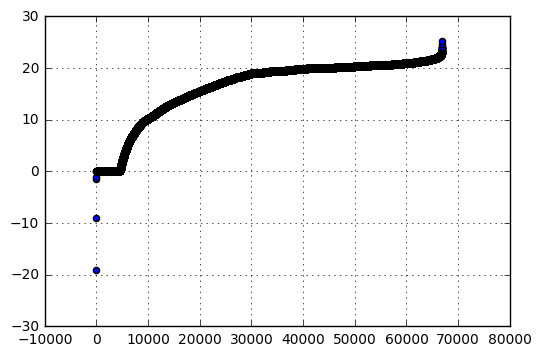

In [16]:
data = credit_amount['credit_amount'].sort_values()
nn = range(len(data))
plt.scatter(nn,data)
plt.grid(True)
plt.show()

In [17]:
def getNum(x):
    if x < 10: return 1
    if x < 15: return 2
    if x < 18: return 3
    if x < 22: return 4
    return 5
credit_amount['credit_amount#0'] = credit_amount['credit_amount'].apply(lambda x:getNum(x))
credit_amount.drop(['credit_amount'],axis=1,inplace=True)
credit_amount.head()

,credit_amount#0
userid,
2,4
3,4
4,3
5,4
6,4


In [18]:
#  可用金额  avail_amount
avail_amount = bill_data[['userid','avail_amount']]
avail_amount = pd.pivot_table(avail_amount,index=['userid'],values=['avail_amount'],aggfunc=np.mean)
avail_amount.head()

,avail_amount
userid,
2,0.000000
3,0.000000
4,1.014342
5,0.000000
6,2.447743


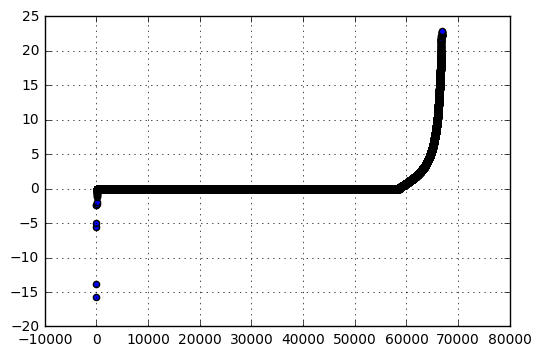

In [19]:
data = avail_amount['avail_amount'].sort_values()
nn = range(len(data))
plt.scatter(nn,data)
plt.grid(True)
plt.show()

In [20]:
def getNum(x):
    if x < 1: return 1
    if x < 5: return 2
    if x < 10: return 3
    if x < 15: return 4
    return 5
avail_amount['avail_amount#0'] = avail_amount['avail_amount'].apply(lambda x:getNum(x))
avail_amount.drop(['avail_amount'],axis=1,inplace=True)
avail_amount.head()

,avail_amount#0
userid,
2,1
3,1
4,2
5,1
6,2


In [21]:
# 预借现金额度  prepare_amount
prepare_amount = bill_data[['userid','prepare_amount']]
prepare_amount = pd.pivot_table(prepare_amount,index=['userid'],values=['prepare_amount'],aggfunc=np.mean)
prepare_amount.head()

,prepare_amount
userid,
2,7.087560
3,0.000000
4,7.808445
5,19.971271
6,13.788434


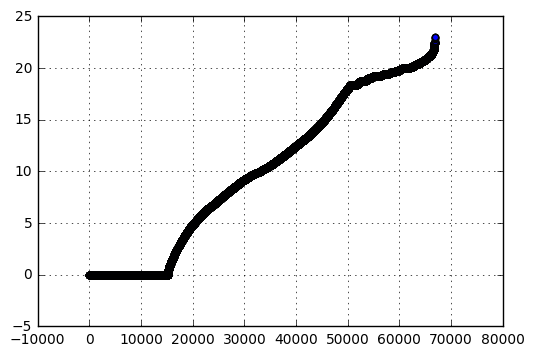

In [22]:
data = prepare_amount['prepare_amount'].sort_values()
nn = range(len(data))
plt.scatter(nn,data)
plt.grid(True)
plt.show()

In [23]:
def getNum(x):
    if x < 1: return 1
    if x < 5: return 2
    if x < 10: return 3
    if x < 18: return 4
    return 5
prepare_amount['prepare_amount#0'] = prepare_amount['prepare_amount'].apply(lambda x:getNum(x))
prepare_amount.drop(['prepare_amount'],axis=1,inplace=True)
prepare_amount.head()

,prepare_amount#0
userid,
2,3
3,1
4,3
5,5
6,4


In [24]:
# 循环利息 circ_interest
circ_interest = bill_data[['userid','circ_interest']]
circ_interest = pd.pivot_table(circ_interest,index=['userid'],values=['circ_interest'],aggfunc=np.mean)
circ_interest.head()

,circ_interest
userid,
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0


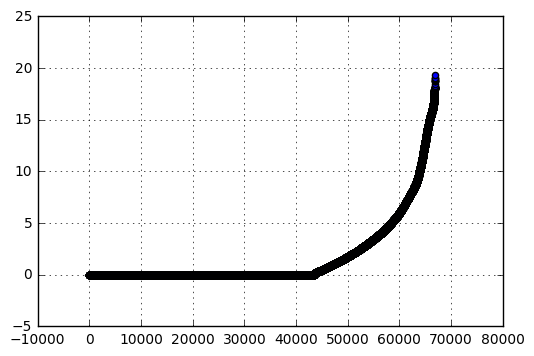

In [25]:
data = circ_interest['circ_interest'].sort_values()
nn = range(len(data))
plt.scatter(nn,data)
plt.grid(True)
plt.show()

In [26]:
def getNum(x):
    if x < 1: return 1
    if x < 5: return 2
    if x < 10: return 3
    if x < 15: return 4
    return 5
circ_interest['circ_interest#0'] = circ_interest['circ_interest'].apply(lambda x:getNum(x))
circ_interest.drop(['circ_interest'],axis=1,inplace=True)
circ_interest.head()

,circ_interest#0
userid,
2,1
3,1
4,1
5,1
6,1


In [27]:
datas = circ_interest.join([prepare_amount,avail_amount,consume_amount,credit_amount])
datas.head()

,circ_interest#0,prepare_amount#0,avail_amount#0,consume_amount#0,credit_amount#0
userid,,,,,
2,1,3,1,1,4
3,1,1,1,1,4
4,1,3,2,1,3
5,1,5,1,1,4
6,1,4,2,1,4


In [28]:
datas.to_csv("../data/train/bill_detail_1.csv")